In [1]:
import numpy as np
import pylab
import matplotlib.pyplot as plt
from qiskit.circuit.library import TwoLocal, EfficientSU2

import sys
sys.path.append('../utility')
from vqe_run import *
from qc_ansatze import *

# lambda = 2.0

this notebook is a copy of the lambda=0.2 notebook. Original 8 ansatze were used. 

In [2]:
Hpauli =[('IIIIII', 7.5),
  ('IIIIIZ', -0.5),
  ('IIIIZI', -0.5),
  ('IIIZII', -0.5),
  ('IIZIII', -0.5),
  ('IXXIXX', -0.5),
  ('IZIIII', -0.5),
  ('XIXXIX', -0.5),
  ('XXIXXI', -0.5),
  ('ZIIIII', -0.5)]

from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms import NumPyEigensolver
H4q = SparsePauliOp.from_list(Hpauli)

# exactly diagonalize the system using numpy routines
solver = NumPyEigensolver(k=4)
exact_solution = solver.compute_eigenvalues(H4q)
print("Exact Result of qubit hamiltonian:", np.real(exact_solution.eigenvalues))
E_exact = np.round(np.real(exact_solution.eigenvalues)[0],5)
E_exact

Exact Result of qubit hamiltonian: [4.26794919 5.09678807 5.09678807 5.09678807]


4.26795

# TwoLocal circuit ansatze

In [5]:
reps = 3
ansatz_0a_3f = TL_ansatz(H4q.num_qubits, 'ry', 'crx', "circular", reps)
ansatz_0b_3f = TL_ansatz(H4q.num_qubits, 'rz', 'crx', 'circular', reps)
ansatz_0c_3f = TL_ansatz(H4q.num_qubits, ['ry','rz'], 'crx', 'circular', reps)
ansatz_0d_3f = TL_ansatz(H4q.num_qubits,['ry','y'], 'crx', 'circular', reps)

ansatz_1a_3f =  TL_ansatz(H4q.num_qubits, 'ry', 'crx', "full", reps)
ansatz_1b_3f =  TL_ansatz(H4q.num_qubits, 'rz', 'crx', "full", reps)
ansatz_1c_3f =  TL_ansatz(H4q.num_qubits, ['ry','rz'], 'crx', "full", reps)
ansatz_1d_3f =  TL_ansatz(H4q.num_qubits, ['ry','y'], 'crx', "full", reps)

Circuit ansatz with 42 parameters
Circuit ansatz with 42 parameters
Circuit ansatz with 66 parameters
Circuit ansatz with 42 parameters
Circuit ansatz with 69 parameters
Circuit ansatz with 69 parameters
Circuit ansatz with 93 parameters
Circuit ansatz with 69 parameters


In [6]:
tl = [ansatz_0a_3f, ansatz_0b_3f, ansatz_0c_3f, ansatz_0d_3f,
     ansatz_1a_3f, ansatz_1b_3f, ansatz_1c_3f, ansatz_1d_3f]
tl_names = ['ansatz_0a_3f','ansatz_0b_3f','ansatz_0c_3f', 'ansatz_0d_3f',
     'ansatz_1a_3f','ansatz_1b_3f','ansatz_1c_3f', 'ansatz_1d_3f']

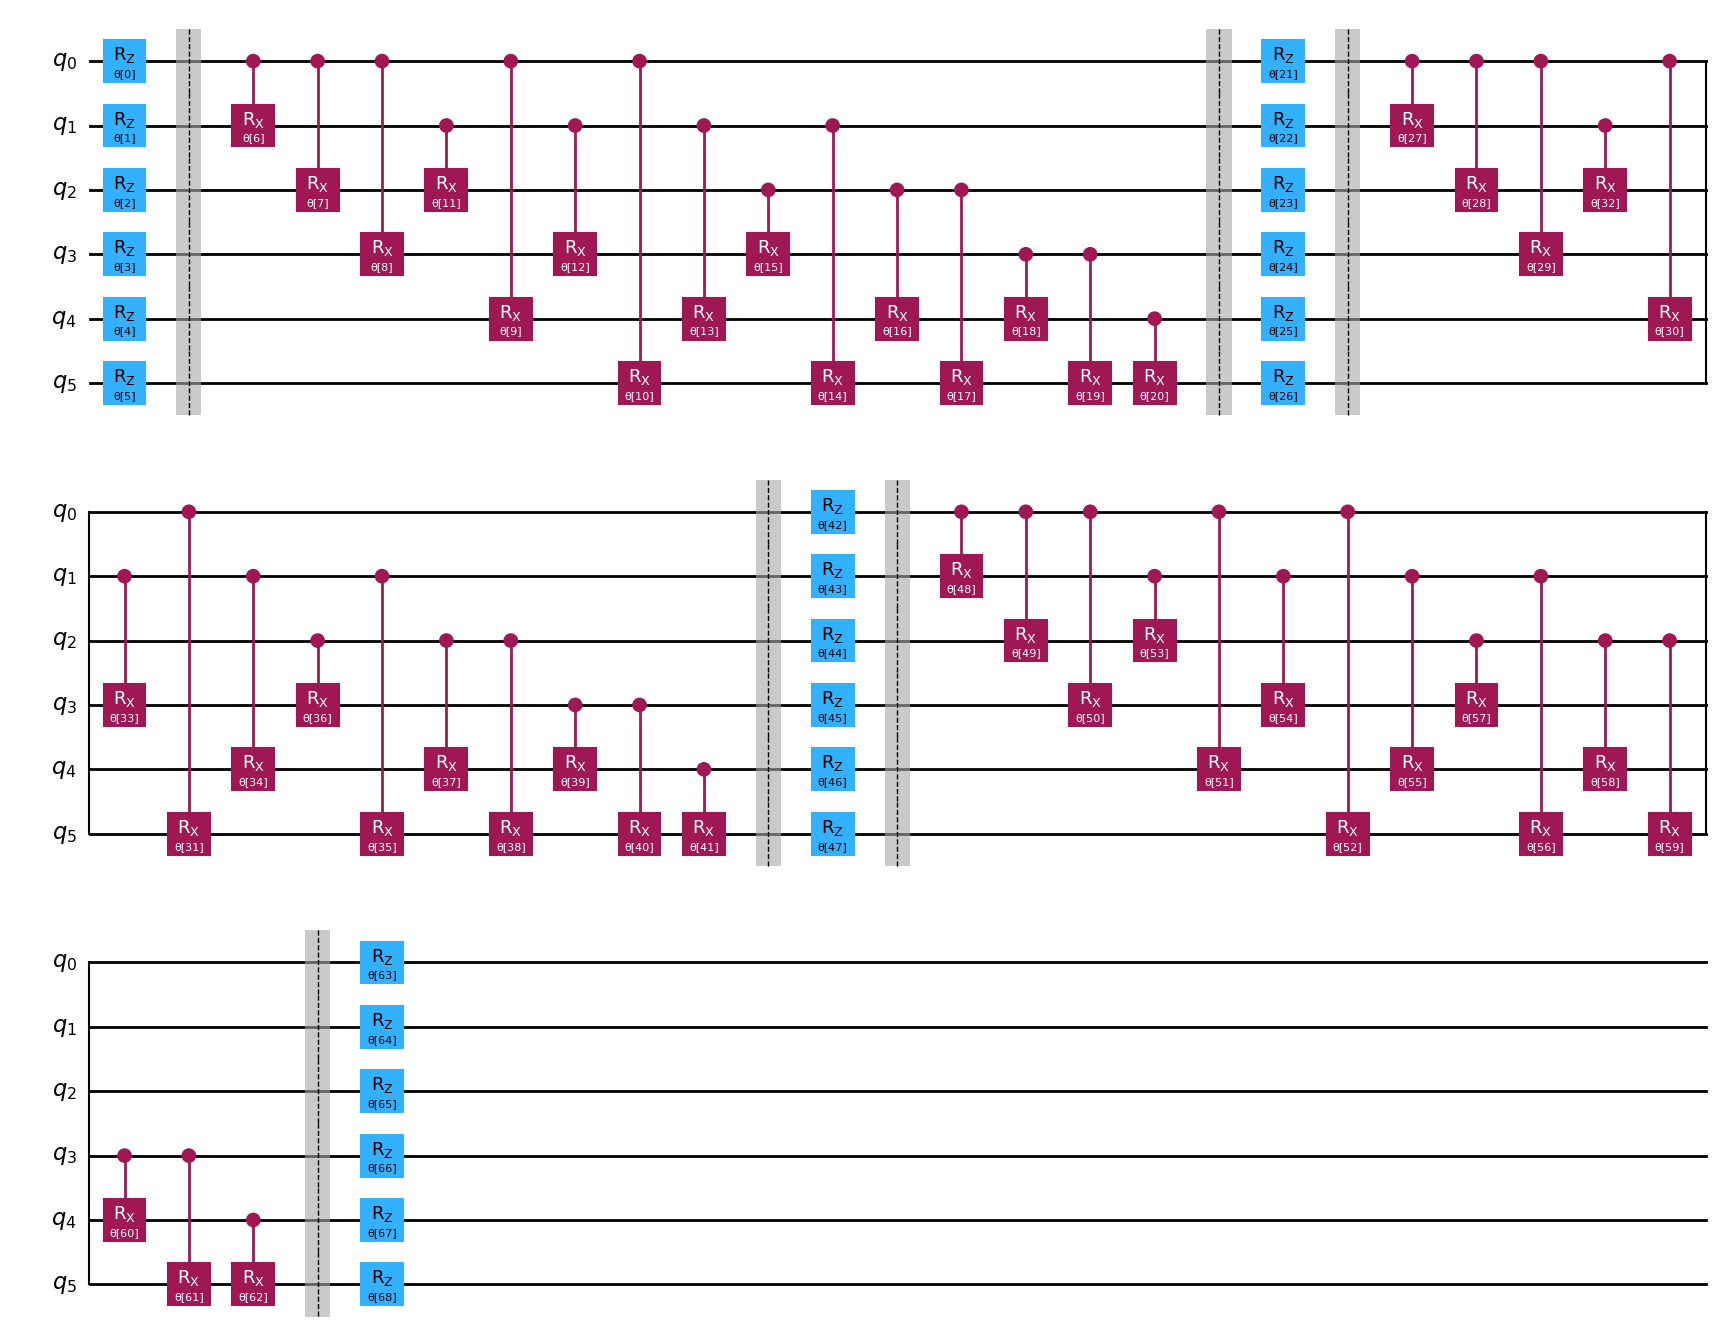

In [8]:
tl[5].decompose().draw(output='mpl')

# EfficientSU2

In [9]:
reps=3
ansatz_0a_su2_3f = ef_ansatz(H4q.num_qubits, 'ry',  "circular", reps)
ansatz_0b_su2_3f = ef_ansatz(H4q.num_qubits, 'rz',  'circular', reps)
ansatz_0c_su2_3f = ef_ansatz(H4q.num_qubits, ['ry','rz'], 'circular', reps)
ansatz_0d_su2_3f = ef_ansatz(H4q.num_qubits,['ry','y'], 'circular', reps)

ansatz_1a_su2_3f =  ef_ansatz(H4q.num_qubits, 'ry',  "full", reps)
ansatz_1b_su2_3f =  ef_ansatz(H4q.num_qubits, 'rz',  "full", reps)
ansatz_1c_su2_3f =  ef_ansatz(H4q.num_qubits, ['ry','rz'], "full", reps)
ansatz_1d_su2_3f =  ef_ansatz(H4q.num_qubits, ['ry','y'],  "full", reps)

Circuit ansatz with 24 parameters
Circuit ansatz with 24 parameters
Circuit ansatz with 48 parameters
Circuit ansatz with 24 parameters
Circuit ansatz with 24 parameters
Circuit ansatz with 24 parameters
Circuit ansatz with 48 parameters
Circuit ansatz with 24 parameters


In [10]:
effsu2 = [ansatz_0a_su2_3f, ansatz_0b_su2_3f, ansatz_0c_su2_3f, ansatz_0d_su2_3f, 
          ansatz_1a_su2_3f, ansatz_1b_su2_3f, ansatz_1c_su2_3f, ansatz_1d_su2_3f]
effsu2_names = ['ansatz_0a_su2_3f', 'ansatz_0b_su2_3f', 'ansatz_0c_su2_3f','ansatz_0d_su2_3f', 
          'ansatz_1a_su2_3f', 'ansatz_1b_su2_3f', 'ansatz_1c_su2_3f', 'ansatz_1d_su2_3f']

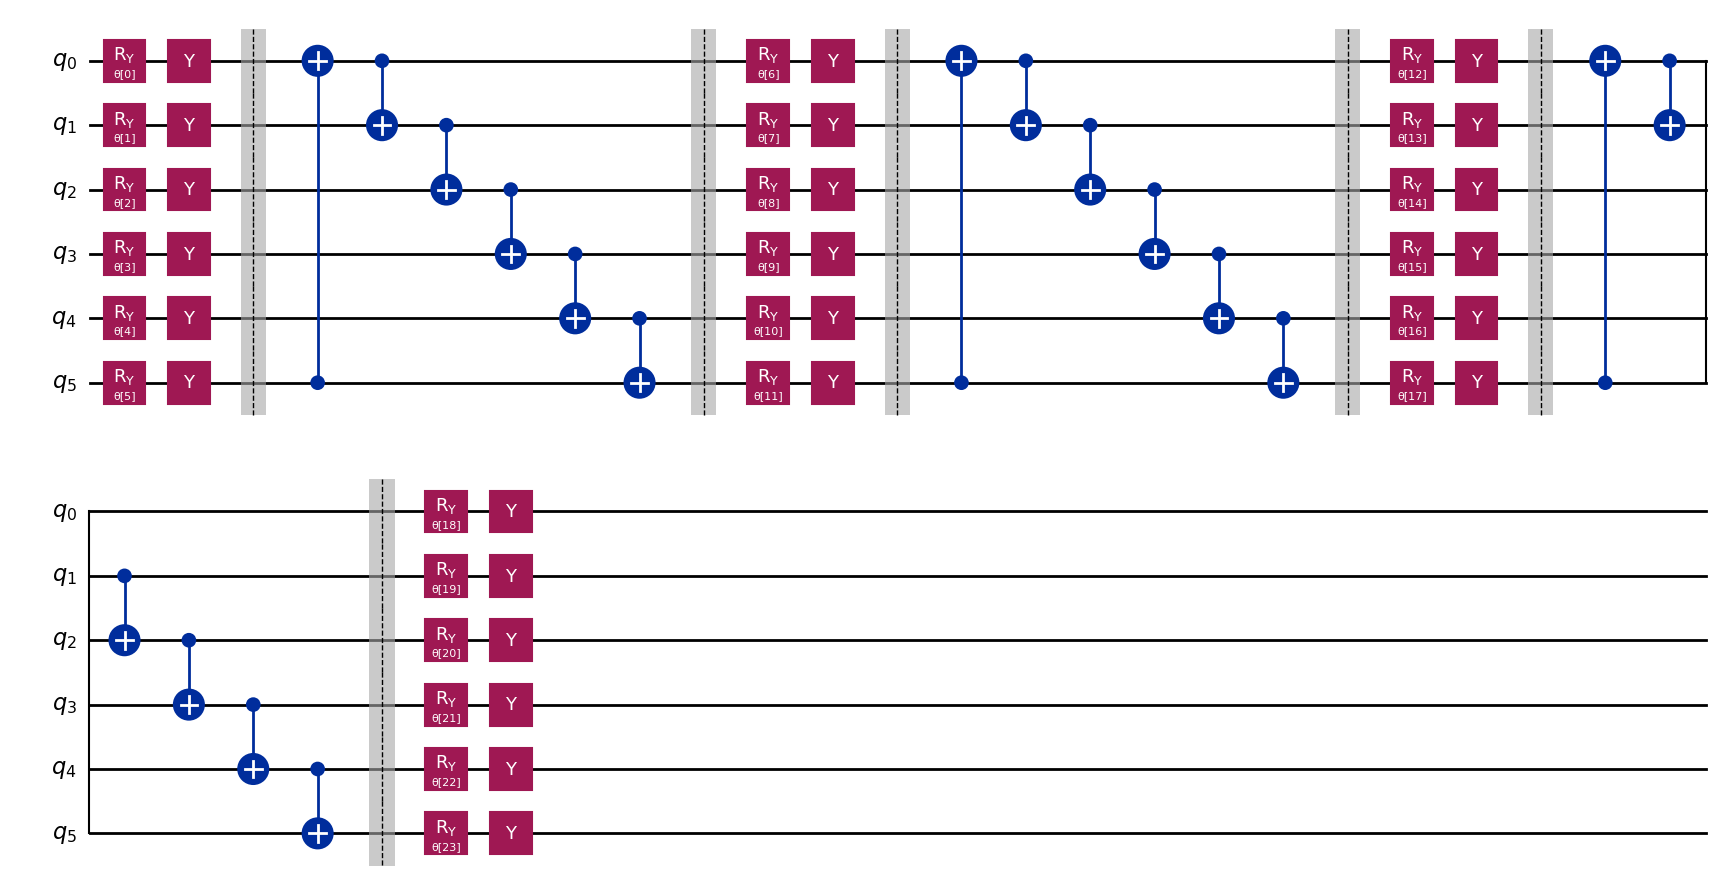

In [11]:
effsu2[3].decompose().draw(output='mpl')

# QVE

## COBYLA: EffSU2

In [12]:
res_list = []
for i in range(len(effsu2)):
    print(f'At step {i} with {effsu2_names[i]}')
    qve = QVE(COBYLA, effsu2[i], H4q, iterations_=300)
    result = qve.run_qve_w_specified_optimizer()
    print(f'Length of this optimization {len(qve.values)} \n')
    res_list.append(pd.DataFrame({effsu2_names[i]:qve.values}))
    
df1 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df1.to_csv('results/qve_l2_l2.0_effsu2_3f_cobyla.csv')

At step 0 with ansatz_0a_su2_3f
VQE result: 5.45117
Length of this optimization 300 

At step 1 with ansatz_0b_su2_3f
VQE result: 4.49805
Length of this optimization 145 

At step 2 with ansatz_0c_su2_3f
VQE result: 5.91504
Length of this optimization 300 

At step 3 with ansatz_0d_su2_3f
VQE result: 5.01367
Length of this optimization 297 

At step 4 with ansatz_1a_su2_3f
VQE result: 4.67676
Length of this optimization 294 

At step 5 with ansatz_1b_su2_3f
VQE result: 4.49805
Length of this optimization 145 

At step 6 with ansatz_1c_su2_3f
VQE result: 4.85156
Length of this optimization 300 

At step 7 with ansatz_1d_su2_3f
VQE result: 4.64258
Length of this optimization 298 



In [13]:
df1

,ansatz_0a_su2_3f,ansatz_0b_su2_3f,ansatz_0c_su2_3f,ansatz_0d_su2_3f,ansatz_1a_su2_3f,ansatz_1b_su2_3f,ansatz_1c_su2_3f,ansatz_1d_su2_3f
0,7.550781,4.498047,7.593750,7.598633,7.420898,4.498047,7.560547,7.888672
1,7.491211,4.498047,7.634766,7.733398,7.099609,4.498047,7.320312,7.729492
2,7.584961,4.498047,7.559570,7.440430,7.116211,4.498047,7.319336,7.862305
3,7.219727,4.498047,7.394531,7.626953,7.063477,4.498047,7.446289,7.859375
4,7.508789,4.498047,7.424805,7.839844,7.352539,4.498047,7.074219,7.550781
...,...,...,...,...,...,...,...,...
295,5.457031,NaN,5.915039,5.013672,NaN,NaN,4.877930,4.642578
296,5.455078,NaN,5.926758,5.013672,NaN,NaN,4.866211,4.642578
297,5.456055,NaN,5.943359,NaN,NaN,NaN,4.888672,4.642578
298,5.453125,NaN,5.965820,NaN,NaN,NaN,4.851562,NaN


## COBYLA: TwoLocal

In [14]:
res_list = []
for i in range(len(tl)):
    print(f'At step {i} with {tl_names[i]}')
    qve = QVE(COBYLA, tl[i], H4q, iterations_=250)
    result = qve.run_qve_w_specified_optimizer()
    print(f'Length of this optimization {len(qve.values)} \n')
    res_list.append(pd.DataFrame({tl_names[i]:qve.values}))
    
df2 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df2.to_csv('results/qve_l2_l2.0_twolocal_3f_cobyla.csv')

At step 0 with ansatz_0a_3f
VQE result: 4.44336
Length of this optimization 250 

At step 1 with ansatz_0b_3f
VQE result: 4.49805
Length of this optimization 250 

At step 2 with ansatz_0c_3f
VQE result: 4.46582
Length of this optimization 250 

At step 3 with ansatz_0d_3f
VQE result: 4.44336
Length of this optimization 250 

At step 4 with ansatz_1a_3f
VQE result: 4.47656
Length of this optimization 250 

At step 5 with ansatz_1b_3f
VQE result: 4.49805
Length of this optimization 250 

At step 6 with ansatz_1c_3f
VQE result: 4.53027
Length of this optimization 250 

At step 7 with ansatz_1d_3f
VQE result: 4.47656
Length of this optimization 250 



In [15]:
df2

,ansatz_0a_3f,ansatz_0b_3f,ansatz_0c_3f,ansatz_0d_3f,ansatz_1a_3f,ansatz_1b_3f,ansatz_1c_3f,ansatz_1d_3f
0,6.075195,4.498047,7.074219,6.075195,7.630859,4.498047,8.165039,7.630859
1,5.705078,4.498047,7.414062,5.705078,7.947266,4.498047,8.086914,7.947266
2,5.288086,4.498047,7.476562,5.288086,7.948242,4.498047,8.176758,7.948242
3,4.806641,4.498047,6.713867,4.806641,7.906250,4.498047,7.973633,7.906250
4,5.043945,4.498047,6.769531,5.043945,7.813477,4.498047,7.955078,7.813477
...,...,...,...,...,...,...,...,...
245,4.471680,4.498047,4.502930,4.471680,4.492188,4.498047,4.590820,4.492188
246,4.447266,4.498047,4.536133,4.447266,4.489258,4.498047,4.550781,4.489258
247,4.453125,4.498047,4.496094,4.453125,4.493164,4.498047,4.553711,4.493164
248,4.445312,4.498047,4.592773,4.445312,4.557617,4.498047,4.544922,4.557617


## SPSA

In [16]:
res_list = []
for i in range(len(effsu2)):
    print(f'At step {i} with {effsu2_names[i]}')
    qve = QVE(SPSA, effsu2[i], H4q, iterations_=250)
    result = qve.run_qve_w_specified_optimizer()
    res_list.append(pd.DataFrame({effsu2_names[i]:qve.values}))
    
df4 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df4.to_csv('results/qve_l2_l2.0_effsu2_3f_spsa.csv')

At step 0 with ansatz_0a_su2_3f
VQE result: 5.30566
At step 1 with ansatz_0b_su2_3f
VQE result: 4.49805
At step 2 with ansatz_0c_su2_3f
VQE result: 5.97559
At step 3 with ansatz_0d_su2_3f
VQE result: 5.40137
At step 4 with ansatz_1a_su2_3f
VQE result: 4.51562
At step 5 with ansatz_1b_su2_3f
VQE result: 4.49805
At step 6 with ansatz_1c_su2_3f
VQE result: 4.59570
At step 7 with ansatz_1d_su2_3f
VQE result: 4.50293


In [17]:
df4

,ansatz_0a_su2_3f,ansatz_0b_su2_3f,ansatz_0c_su2_3f,ansatz_0d_su2_3f,ansatz_1a_su2_3f,ansatz_1b_su2_3f,ansatz_1c_su2_3f,ansatz_1d_su2_3f
0,7.535156,4.498047,7.587891,7.850586,7.465820,4.498047,7.653320,8.180664
1,7.775391,4.503906,7.634766,7.611328,7.470703,4.503906,7.408203,7.828125
2,7.620117,4.507812,7.511719,7.374023,7.513672,4.507812,7.242188,8.458008
3,7.371094,4.486328,7.525391,7.759766,7.350586,4.486328,7.611328,7.452148
4,7.493164,4.476562,7.492188,7.396484,7.205078,4.476562,7.706055,7.964844
...,...,...,...,...,...,...,...,...
546,5.527344,4.498047,6.211914,5.481445,4.765625,4.498047,4.817383,4.760742
547,5.526367,4.503906,5.971680,5.364258,4.696289,4.503906,4.743164,4.689453
548,5.463867,4.498047,6.209961,5.561523,4.598633,4.498047,4.772461,4.593750
549,5.495117,4.503906,5.965820,5.512695,4.607422,4.503906,4.763672,4.590820


In [18]:
res_list = []
for i in range(len(tl)):
    print(f'At step {i} with {tl_names[i]}')
    qve = QVE(SPSA, tl[i], H4q, iterations_=250)
    result = qve.run_qve_w_specified_optimizer()
    res_list.append(pd.DataFrame({tl_names[i]:qve.values}))
    
df3 = pd.concat([res_list[i] for i in range(len(res_list))], axis = 1)
df3.to_csv('results/qve_l2_l2.0_twolocal_3f_spsa.csv')


At step 0 with ansatz_0a_3f
VQE result: 4.51562
At step 1 with ansatz_0b_3f
VQE result: 4.49805
At step 2 with ansatz_0c_3f
VQE result: 4.51855
At step 3 with ansatz_0d_3f
VQE result: 4.51562
At step 4 with ansatz_1a_3f
VQE result: 4.50391
At step 5 with ansatz_1b_3f
VQE result: 4.49805
At step 6 with ansatz_1c_3f
VQE result: 4.49609
At step 7 with ansatz_1d_3f
VQE result: 4.50391


In [19]:
df3

,ansatz_0a_3f,ansatz_0b_3f,ansatz_0c_3f,ansatz_0d_3f,ansatz_1a_3f,ansatz_1b_3f,ansatz_1c_3f,ansatz_1d_3f
0,5.921875,4.498047,7.386719,5.921875,7.866211,4.498047,7.927734,7.866211
1,6.462891,4.503906,6.767578,6.462891,7.751953,4.503906,8.622070,7.751953
2,6.080078,4.507812,7.517578,6.080078,7.749023,4.507812,8.436523,7.749023
3,5.994141,4.486328,6.550781,5.994141,7.578125,4.486328,8.118164,7.578125
4,6.083984,4.476562,6.707031,6.083984,7.640625,4.476562,8.181641,7.640625
...,...,...,...,...,...,...,...,...
546,4.663086,4.498047,4.625977,4.663086,4.572266,4.498047,4.563477,4.572266
547,4.572266,4.503906,4.583008,4.572266,4.590820,4.503906,4.580078,4.590820
548,4.512695,4.498047,4.590820,4.512695,4.603516,4.498047,4.589844,4.603516
549,4.647461,4.503906,4.602539,4.647461,4.567383,4.503906,4.520508,4.567383
